# Etude scikit-image

CPU times: user 391 ms, sys: 25.5 ms, total: 416 ms
Wall time: 408 ms


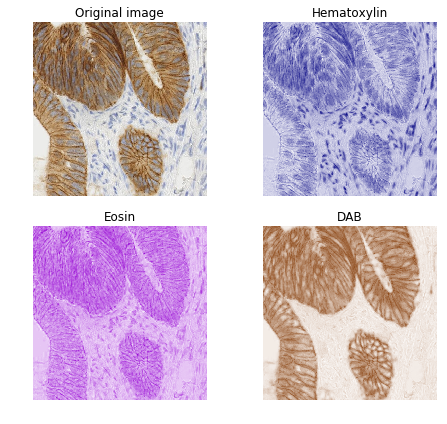

In [3]:
%%time
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the orginal one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

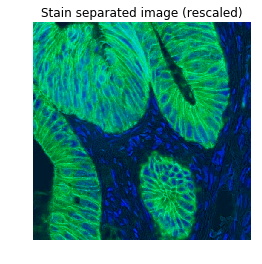

CPU times: user 417 ms, sys: 13.3 ms, total: 430 ms
Wall time: 431 ms


In [4]:
%%time
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()